## generate data for scalability

In [8]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

In [5]:
train = pd.read_csv("./../../ordinal_regression/orca/datasets2/bigdata/wlb/matlab/train_wlb.1", delimiter=" ", header = None)
test = pd.read_csv("./../../ordinal_regression/orca/datasets2/bigdata/wlb/matlab/test_wlb.1", delimiter=" ", header = None)

In [15]:

n_list = [100,316,1000,3162,10000]
for i, n in enumerate(n_list):
    train_scale = train[:n]
    train_scale.to_csv(f"./../../ordinal_regression/orca/scale/wlb/matlab/train_wlb.{i}", sep=" ", header = False)
    test.to_csv(f"./../../ordinal_regression/orca/scale/wlb/matlab/test_wlb.{i}", sep=" ", header = False)

In [16]:

# train = pd.read_csv("./../../ordinal_regression/orca/datasets2/bigdata/winequality/matlab/train_winequality.1", delimiter=" ", header = None)
# test = pd.read_csv("./../../ordinal_regression/orca/datasets2/bigdata/winequality/matlab/test_winequality.1", delimiter=" ", header = None)

In [21]:
# n_list = [100,316,1000,3162]
# for i, n in enumerate(n_list):
#     train_scale = train[:n]
#     train_scale.to_csv(f"./../../ordinal_regression/orca/winequality/matlab/train_winequality.{i}", sep=" ", header = False)
#     test.to_csv(f"./../../ordinal_regression/orca/winequality/matlab/test_winequality.{i}", sep=" ", header = False)
#     print(train_scale.iloc[:,-1].unique())

[4 3 5 6 2]
[4 3 5 6 2 1]
[4 3 5 6 2 1 7]
[4 3 5 6 2 1 7]


## Analyze

[0.003653 0.011128 0.03414  0.113857 0.3451  ] [0.003653 0.011128 0.03414  0.113857 0.3451  ]
[1.1505000e-02 2.3895000e-02 2.9034400e-01 3.5489350e+00 3.4612938e+01]
[1.0902000e-02 3.7231000e-02 3.0674000e-01 2.8734280e+00 3.2502625e+01]
[1.1261000e-02 3.9261000e-02 3.1029500e-01 2.9772950e+00 3.2920525e+01]
[9.9330000e-03 4.5128000e-02 3.2507300e-01 3.1190720e+00 3.2219589e+01]
[1.1246000e-02 3.6095000e-02 3.2926200e-01 3.1688080e+00 3.1555595e+01]
[1.0445000e-02 3.5820000e-02 3.0188000e-01 2.9226460e+00 3.1607864e+01]
[1.0452000e-02 3.4508000e-02 3.0212400e-01 2.8265080e+00 3.1772606e+01]
[1.0742000e-02 3.8261000e-02 3.1123400e-01 2.9056400e+00 3.2478477e+01]
[1.0773000e-02 3.6697000e-02 3.0429800e-01 2.9018940e+00 3.2711288e+01]
[1.1253000e-02 3.8834000e-02 2.9565400e-01 2.9029540e+00 3.2146515e+01]
[1.1505000e-02 4.5128000e-02 3.2926200e-01 3.5489350e+00 3.4612938e+01] [1.1505000e-02 4.5128000e-02 3.2926200e-01 3.5489350e+00 3.4612938e+01]
[1.0704000e-02 4.2381000e-02 3.3377800e-01

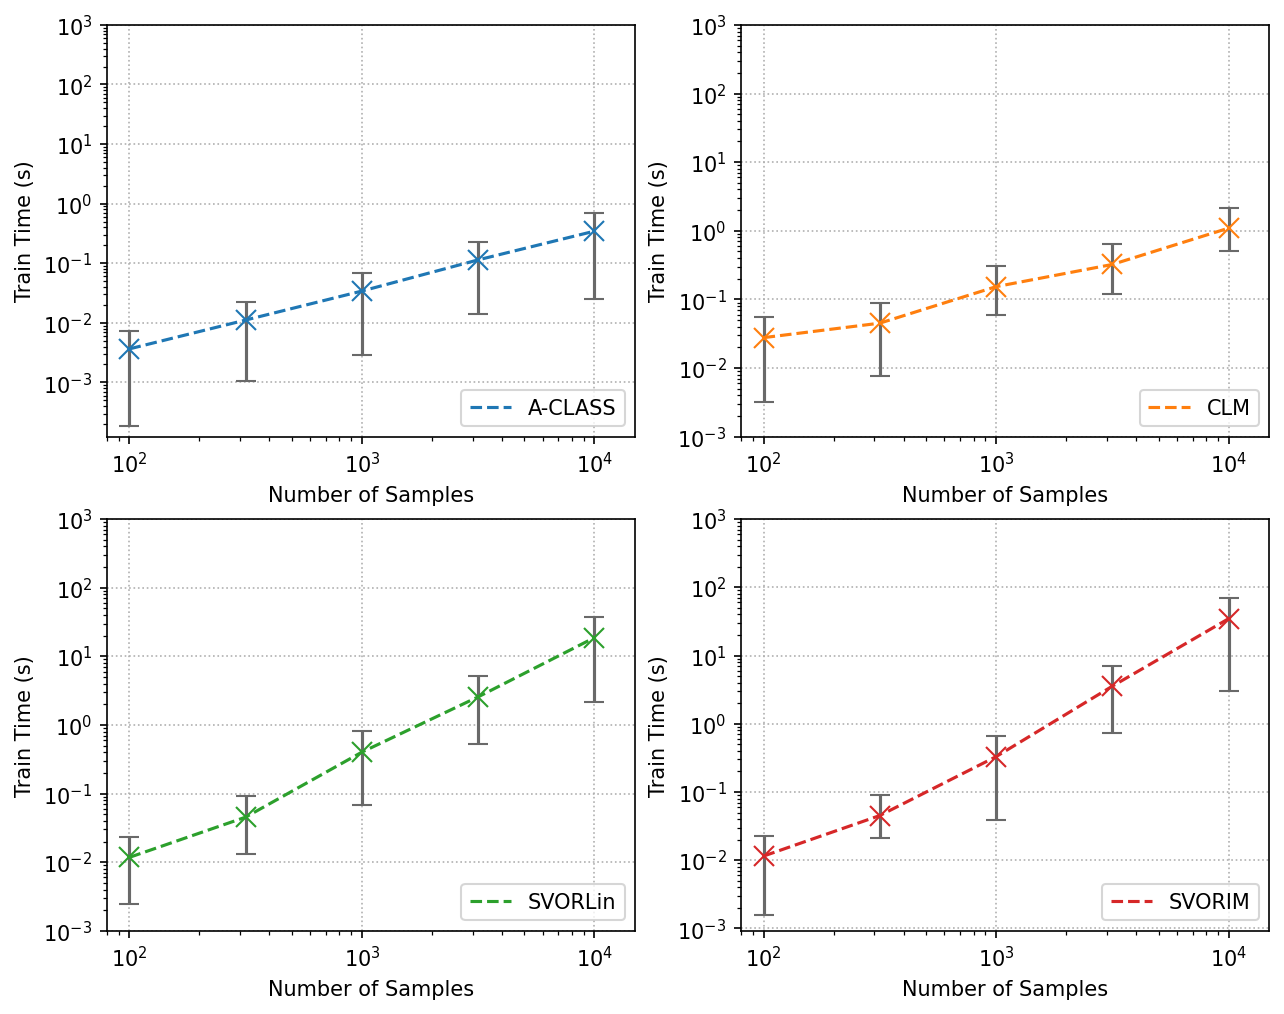

In [43]:
dir = glob.glob(f"./../../ordinal_regression/orca/src/Experiments/scale2/Experiments/*")

n_list = [100,316,1000,3162,10000]
# svorlint = [1.733444, 10.059242, 97.582001]

fig = plt.figure(figsize=(10, 8), dpi=150, facecolor="white")
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
# svorimt = [0.545464, 2.968689,16.831017,340.134544, 7230.891205]
files = glob.glob("./../tvaclm_exp/scale/wlb*.csv")
time_arr = []
for f in files:
    time_arr.append(np.array(pd.read_csv(f).duration))
max_time = np.array(time_arr).max(axis = 0)
min_time = np.array(time_arr).min(axis = 0)
mean_time = np.array(time_arr).max(axis = 0)
print(max_time, mean_time)
ax1.plot(n_list, mean_time, label="A-CLASS", ls="dashed")
ax1.errorbar(n_list, mean_time, yerr = [min_time,max_time], capsize=5, fmt='x',ecolor='dimgray', markeredgecolor = list(mcolors.TABLEAU_COLORS)[0],markersize=10)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(loc='lower right')

ax1.set_yticks([1e-3,1e-2,1e-1,1,1e1,1e2,1e3])
ax1.set_xlim(80,15000)
ax1.set_xlabel("Number of Samples")
ax1.set_ylabel("Train Time (s)")
ax1.grid( linestyle='dotted')
# ax1.savefig(f'figs/scalabiltiy_ACLASS.png')
# plt.scatter(n_list, mean_time, s=10,marker="x")

for d in dir:
    if 'clm' in d:
        ax = ax2
        c = list(mcolors.TABLEAU_COLORS)[1]
        method = "CLM"
    if 'svorlin' in d:
        ax = ax3
        c = list(mcolors.TABLEAU_COLORS)[2]
        method = "SVORLin"
    if 'svorim' in d:
        ax = ax4
        c = list(mcolors.TABLEAU_COLORS)[3]
        method = "SVORIM"
    # plt.figure(figsize=(10, 6), dpi=150, facecolor="white")
    files = glob.glob(f"{d}/*/Results/wlb*/*test.csv")
    time_arr = []
    for f in files:
        df = pd.read_csv(f)
        print(np.array(df.TrainTime))
        time_arr.append(np.array(df.TrainTime))
    max_time = np.array(time_arr).max(axis = 0)
    min_time = np.array(time_arr).min(axis = 0)
    mean_time = np.array(time_arr).max(axis = 0)
    print(max_time, mean_time)
    ax.plot(n_list, mean_time, label = method, color = c, ls="dashed")
    ax.errorbar(n_list, mean_time, yerr = [min_time,max_time], capsize=5, fmt='x', ecolor='dimgray', markeredgecolor = c,markersize=10)
    # plt.scatter(n_list, mean_time,s=10,marker="x")

# plt.plot(n_list[:len(svorlint)], svorlint, label="SVOR Lin")
# plt.plot(n_list[:len(svorimt)], svorimt, label = "SVOR RBF")
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(loc='lower right')

    ax.set_yticks([1e-3,1e-2,1e-1,1,1e1,1e2,1e3])
    ax.set_xlim(80,15000)
    ax.set_xlabel("Number of Samples")
    ax.set_ylabel("Train Time (s)")
    ax.grid( linestyle='dotted')
    # ax.savefig(f'figs/scalabiltiy_{f.split("/")[-5].upper()}.png')
fig.savefig(f'figs/scalabiltiy.pdf')



In [29]:
dir = glob.glob(f"./../../ordinal_regression/orca/src/Experiments/scale2/Experiments/*")
for d in dir:
    print(glob.glob(f"{d}/*/Results/wlb*/*test.csv"))
    break

['./../../ordinal_regression/orca/src/Experiments/scale2/Experiments/svorim/exp-2023-1-7-11-10-11/Results/wlb-scale_svorim/results_test.csv', './../../ordinal_regression/orca/src/Experiments/scale2/Experiments/svorim/exp-2023-1-7-11-10-18/Results/wlb-scale_svorim/results_test.csv', './../../ordinal_regression/orca/src/Experiments/scale2/Experiments/svorim/exp-2023-1-7-11-10-22/Results/wlb-scale_svorim/results_test.csv', './../../ordinal_regression/orca/src/Experiments/scale2/Experiments/svorim/exp-2023-1-7-11-10-58/Results/wlb-scale_svorim/results_test.csv', './../../ordinal_regression/orca/src/Experiments/scale2/Experiments/svorim/exp-2023-1-7-11-11-0/Results/wlb-scale_svorim/results_test.csv', './../../ordinal_regression/orca/src/Experiments/scale2/Experiments/svorim/exp-2023-1-7-11-7-19/Results/wlb-scale_svorim/results_test.csv', './../../ordinal_regression/orca/src/Experiments/scale2/Experiments/svorim/exp-2023-1-7-11-8-42/Results/wlb-scale_svorim/results_test.csv', './../../ordina

In [25]:
dir

['./../../ordinal_regression/orca/src/Experiments/scale2/Experiments/svorim',
 './../../ordinal_regression/orca/src/Experiments/scale2/Experiments/svorlin',
 './../../ordinal_regression/orca/src/Experiments/scale2/Experiments/clm']

In [9]:
import matplotlib.colors as mcolors

mcolors.TABLEAU_COLORS

{'tab:blue': '#1f77b4',
 'tab:orange': '#ff7f0e',
 'tab:green': '#2ca02c',
 'tab:red': '#d62728',
 'tab:purple': '#9467bd',
 'tab:brown': '#8c564b',
 'tab:pink': '#e377c2',
 'tab:gray': '#7f7f7f',
 'tab:olive': '#bcbd22',
 'tab:cyan': '#17becf'}

In [7]:
mcolors.TABLEAU_COLOR

AttributeError: module 'matplotlib.colors' has no attribute 'TABLEAU_COLOR'

In [15]:
list(mcolors.TABLEAU_COLORS)[1]

'tab:orange'